###  Islands: Python Foundations - Chapter 1

[Back to Main Page](0_main_page.ipynb)

[How to use this book interactively on Deepnote](99_how_to_use_this_book.ipynb)

[Download this book](99_how_to_use_this_book_local.ipynb)

<br>

<h1> <center> Populations, Samples, Questions: Why Learn Python? </center> </h1> 

## Why learn data analysis?

Consider these questions:

* Do Covid-19 vaccines work?
* Does having children make people happier?
* Do antidepressants make depressed people feel better?
* What causes knife crime?
* Does frequent social media use cause mental health problems?
* Is climate change caused by human activity?
* Do long prison sentences reduce offending behaviour?

I hope you'll agree these are all interesting and important questions. A sensible answer to any of these questions will almost certainly involve data analysis. This is because each question can be boiled down to being about the relationship between variables. And to establish the relationship between variables, we need data.

For instance, the first question about could be expressed in the following way. Does the variable `vaccine status` (a YES/NO variable) correlate with lower values of these outcome variables: `symptom severity`, `chance of infection`, `chance of hospitalization` or `chance of death`? One way of answering this question, is to collect data about these outcome variables, from vaccinated and unvaccinated people. Then we need some methods for analysing that data to compare the `symptom severity` etc. between the vaccinated and unvaccinated. This will give us some evidence about whether the vaccines work or not.

However, even if that data showed that vaccinated people have lower `symptom severity`, less `chance of hospitalization` etc., there would still be some remaining uncertainty about whether the vaccines work. For instance there may be lifestyle or health-related differences between those who take the vaccine and those who don't. These lifestyle or health-related differences may lead to differences in Covid-19 `symptom severity`, `chance of hospitalization` etc. This may result in an association between vaccine status and lower `symptom severity`, less `chance of hospitalization` etc., [even if the vaccines are not effective](https://www.science.org/doi/full/10.1126/science.abe5938).

We live in a messy world, and often must make decisions - about what to do or what to believe - on the basis of incomplete or inconclusive data. Data analysis is part of statistics. And statistics is the science of dealing with data in conditions of uncertainty. In fact, statistics has been called [the science of uncertainty](http://www.utstat.toronto.edu/mikevans/jeffrosenthal/). Fortunately, statistics gives us a set of procedures for quantifying uncertainty, and for making reasonable models of the relationship between variables, which take into account that uncertainty. For instance, after controlling for the effects of other variables, based on the available data, there is [strong evidence that Covid-19 vaccines do work](https://link.springer.com/article/10.1007/s10787-021-00839-2).

If you are interested in getting reasonable answers to interesting questions, then learning how to conduct data analysis is essential. Python is an excellent option for conducting data analysis, and is fast [gaining prominence in the world of data analysis](https://blog.edx.org/9-top-programming-languages-for-data-science).


## What exactly is python?

Python is a programming language. Programming languages are, at root, *fancy calculators* (to borrow [Dr Juan Klopper's term](https://rpubs.com/juanhklopper/intro_to_R_for_biostats)). They let us write an explicit set of instructions for how a computer should analyse data, step by step.

Relative to traditional 'point-and-click' statistics software (like SPSS), code-based analysis is useful for scientific transparancy, because other researchers can read the code see exactly what analysis was performed. This makes it easier to spot mistakes in the analysis. It is also good for reproducibility, as other researchers can easily run the code themselves to check the results, or apply the analysis to new data to see if the result is replicable.

Python was designed for [readability](https://docs.python-guide.org/writing/style/). So it not only let's us write analyses so that other researchers can see exactly how we've arrived at a result/conclusion, it also keeps that analysis readable and understandable to a human. 

Python is also open-source and free to use (unlike many traditional statistics programs!). This means you can learn it and beginning analysing data free of charge (assuming you have a computer and an internet connection, which if you're reading this, it seems that you do...)

## Why learn python?
This page will not teach you any coding directly (don't worry, the rest of this textbook will!). However, in my experience, when I was learning to code, I found that some introductory texts/materials jumped straight into the coding, and left me with the question:
> 'but *why* would I need to do this? What would I use this for?'

This page will walk through the stages involved in using python to conduct a data analysis to test some interesting hypotheses. It will show you *what* python can easily be used to do, rather than *how* to use python. It will also introduce some foundational statistical concepts, as a first introduction, or refresher. My hope is that this page will show you why it worth putting in the time to learn python. The rest of the textbook will then show you the tools you need to use python to run a similar analysis yourself. (If you would rather skip straight to the coding, you can go directly to the [next page](2_lists_indexing.ipynb)).

Ultimately, it is the questions we use python to answer which are important. The examples in this textbook will use simulated data which I have made for the purposes of teaching. I have used simulated data because it easier for me to explain certain concepts by generating data which clearly illustrate them. But the concepts and analyses apply directly to real-world data as well. At the end of the textbook I will show you how to read real data into python, and perform similar analyses on that real-world data.

## Jupyter notebooks

First, to orient you to the way this textbook is setup, I'll say a few things about [Jupyter notebooks](https://jupyter.org/) (the format this textbook is written in). Jupyter notebooks allow for the integration of text and code. Each notebook is divided up into *cells*. You're currently reading the output of *markdown cell*, which displays text. 

The cell below (with the darker background) is a code cell, which is used for executing code. Anything written in a code cell that comes after the `#` symbol  is a 'comment'. This is used for leaving notes alongside the code, but the comments themselves do not function as code. The comments in this book will explain what each line of code is doing. Do not worry if you do not understand any of the code at first, or if it takes some time to understand it, this is normal.

<b>I recommend that you use this textbook interactively</b>, by running it on Deepnote ([see this page](99_how_to_use_this_book.ipynb)) or downloading it and running it locally on your computer, using Jupyter notebook([see this page](99_how_to_use_this_book_local.ipynb)).

If you are using this book interactively, in order for the rest of the page to work correctly, please run the code cell below, by following these instructions:

<br>
<center> ↓↓↓ <b> Before reading on, please run the code cell below</b>. Click on the cell and press `shift` and `Enter` together.↓↓↓ </center>
<br>

In [1]:
# run this cell (by pressing 'Control' and 'Enter' together) to import the libraries needed for 
# this page

# 'import' tells python to get a set of functions (which is called a library). In the first case this is 
# the numpy library. The 'as' tells python to name the library something (to save us typing out 'numpy'). In this case
# we name the library 'np'
import numpy as np

# here we import the pandas library and name it 'pd'
import pandas as pd

# here we import the matplotlib.pyplot library and name it 'plt'
import matplotlib.pyplot as plt

# import the scipy.stats library 
import scipy.stats

# import the statsmodels library
import statsmodels.api as sm

# import the py_found library, containing a set of custom functions for this textbook
import py_found

If you are using this textbook interactively, it is <b>very important that you run every code cell in each notebook, in the order in which they appear. </b> If, when you run a code cell later on in the notebook, you get an error, this is probably because a code cell earlier in the notebook was not run. (E.g. the activity of the later code cell probably depends on some code that should have been run in an earlier cell). This is not a huge issue, just re-run the earlier cells in order, and it should correct the error.

Now, with that aside, let's delve into some statistical questions, of the sort python is helpful for analysing...

## An impaired island

<br>

<center> <img src="https://github.com/pxr687/islands_python_foundations/blob/master/images/impaired_island.png?raw=true" width="400"> </center>

<br>

Imagine an island with exactly 1000 people living on it. Further imagine, that you are visiting this island with a group of scientists, from various disciplines, in order to conduct research.

A neuropsychologist in your research group states that there is a high prevalence of cognitive impairment on the island, amongst residents of all age groups. That is, residents of the island perform worse on various cognitive tasks than residents of similar islands in the surrounding area. In fact, the neuopsychologist states that all 1000 residents show some signs of cognitive impairment. The island is heavily polluted, and an epidemiologist in your research group has suggested that this is what is leading to cognitive impairment in the indviduals who live on the island.

You group is here to do two things: 

* to help analyse data from a clinical trial which is happening on the island. The trial is of a drug hypothesized to reduce cognitive impairment.
* to investigate the hypothesis that the high level of pollution on the island is the cause of the cognitive impairment.

## The drugs don't work?

The clinical trial that is happening on the island is of a drug called Adirudin. In the trial, 100 participants have been randomly assigned into one of two groups. ('Randomly' in this context means that each participant had the same probability of ending up in either group. In this case participants were randomized to either group using a coinflip). 

Participants in the placebo group receive an inert pill, which is not pharmacologically active e.g. it does nothing to reduce cognitive impairment.

Participants in the treatment group receive a specific dose of Adirudin, which is hypothesized (but not proven) to reduce cognitive impairment.

The trial has recently finished. At the end of the study, both groups of participants completed an assessment questionairre which measures cognitive impairment. Their score at the end of the study is compared to their score at the beginning (before they received either the placebo pill or Adirudin). 

The dataframe below shows the results of the trial (this dataframe shows the scores for all 100 participants in the trial, and so it is very long, have a look at it, and then scroll to the next cell):

*Note: Adirudin is not a real drug!*

In [2]:
# just run this cell (press 'Control' and 'Enter' together) to generate the dataframe
placebo_change, drug_change, trial_df = py_found.data_gen_trial(1000)
pd.set_option('display.max_rows', None)
# show the table
trial_df

,group,change
0,placebo,-
1,placebo,+
2,placebo,-
3,placebo,-
4,placebo,-
5,placebo,+
6,placebo,+
7,placebo,-
8,placebo,+
9,placebo,-


Each row of the table contains the data for one participant in the trial. The `group` column tells us whether that participant was in the `placebo` group or the `drug` group.

The `change` column shows a `+` or a `-` indicating whether a participant's cognitive impairment score improved (`+`) or got worse (`-`) at the end of the trial, relative to their score at the beginning of the trial.

(If you were wondering, the column on the left hand side, containing numbers from 0 to 99 is the *index*. Essentially, this is just unique label for each row of the dataframe).

Before running any statistical analyses, it is always important to graphically inspect the data, because:

><i><center>'The dominant task of the human cortex is to extract visual information from the activity patterns on the retina. Our visual system is therefore exceedingly good at detecting patterns in visualized data sets. As a result, one can almost always see what is happening before it can be demonstrated through a quantitative analysis of the data. Visual data displays are also helpful at finding extreme data values, which are often caused by [...] mistakes in the data acquisition.' </i> <br> (page 51, Haslwanter, 2016, An Introduction to Statistics with Python)<center>

As you can see from the table above, it is pretty hard to see patterns in the raw data. The graph below shows the percentage of participants in each group who showed a positive improvement in symptoms at the end of the trial:

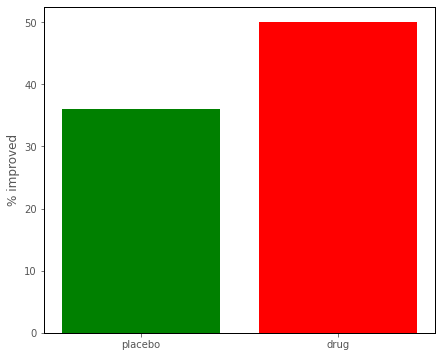

In [3]:
# just run this cell, it code just generates the graph below, and sets the graph style for the rest of the notebook

# the command below make plots look like R (another programming language, with prettier plots than python (in my opinion))
py_found.r_ify()

# this code creates the plot
plt.bar(['placebo', 'drug'], 
        [np.sum(placebo_change == '+')/len(placebo_change)*100, np.sum(drug_change == '+')/len(drug_change)*100 ],
       color = ['green', 'red'])
plt.ylabel('% improved')
plt.show()

It certainly looks as though a higher percentage of the drug group showed a positive improvement.

Your research team calculate the actual difference in the percentages between the two groups, by subtracting the percentage of positive responders in the placebo group from the percentage of positive responders in the drug group:

In [4]:
# just run this cell, it calculates, and then shows, the difference in the percentages
print('There was a', np.round(np.sum(drug_change == '+')/len(drug_change)*100 - np.sum(placebo_change == '+')/len(placebo_change)*100, 2), '% difference in the percentage of positive responders between the groups.')

There was a 14.0 % difference in the percentage of positive responders between the groups.


So, the percentage of the drug group who showed a positive improvement was 14% larger than the percentage in the placebo group who showed a positive improvement. The technical name for this difference in percentages is the *risk difference*. The term 'risk' might seem strange (as we are dealing with the difference in the percentage of those with *improved* symptoms!). But in statistics 'risk' just means the proportion of a group experiencing some event - which can be good or bad. In this case, the event is good, it is an improvment in symptoms.

Can we conclude that the drug works? 

There are a few ways to think about that question. Remember that the clinical trial had only 100 participants. This is far short of the 1000 people who make up the population of the island. In statistics, a *population* is all the elements which are of interest for a specific question. In this case, the question is whether the drug is effective. The population we care about is the 1000 people who live on the island who have cognitive impairment.

We have only observed 100 people, but we need to know if the pattern we observed in the clinical trial (a 14% greater treatment response in the drug group) will apply to whole population of the island. There are a few ways to think about what this means:

* If we gave the drug to all 1000 residents of the island, would we observe something like a 14% greater treatment response relative to a situation where the all 1000 residents received a placebo?

* Alternatively, if we conducted the trial using all 1000 residents, with 500 randomly assigned to receive the drug and 500 randomly assigned to receive the placebo, would would we observe something like a 14% greater treatment response in the drug group?

Both of the above questions are equivalent re-phrasings of the question "does the clinical trial show that the drug works?", expressed in terms of the population of the island. If the drug doesn't work, it means that we would not observe the same 14% effect in the population.

It might happen, for instance, that the drug group in the clinical trial, just through random sampling, contained people who were more likely to show spontaneous improvement in their symptoms. If that is true, then the drug might not be effective if given to everyone on the island, as the improvement observed in the trial would result from chance, not from the drug being effective. If this is the case, then the result from the trial is a *fluke* and does not represent a systematic relationship between taking the drug and an improvement in cognitive impairment symptoms.

What we need then, is some way of working out if the result in the trial is a fluke. But first, let's go into a little more detail about how fluke results can occur, even in well conducted experiments...


## What does it mean for a result to be a 'fluke'? 

A 'fluke' result just means that the pattern we see in our sample is not reflective of the pattern in the population that the sample came from. We are almost never in a position where we can analyse data from an entire population. So we must make inferences about that population from the samples we have. 

As mentioned above, in this context, a fluke result would mean that the 14% risk difference between the groups in the trial would not be reflected if we conducted the same trial with all 1000 residents of the island. The participants in the trial were randomly sampled from the population. Random sampling should, on average, produce samples which are representative of the underlying population. So how can a fluke result come about by random sampling?

Imagine if we did conduct the trial with all 1000 islanders, randomly allocating 500 of them to drug group and 500 of them to placebo group. Let's think about how the symptom change scores of all 1000 islanders would look if there was <b> exactly 0% difference between the groups </b>. The two graphs below show how the data could look in this scenario. (There are many ways the data could look, but the important feature is that the risk difference between the groups is 0%).

The graph on the left shows the change scores for all 1000 islanders, in this hypothetical scenario where the drug is 0% effective. Each of the 1000 symbols shows the change score for one person (either `+` or `-`). The color of the symbol shows which group the islander was in (green for `placebo`, red for `drug`). (The location on the graph of each symbol doesn't have any meaning, only the type of symbol and its color: you can contextualize the graph by picturing all the islanders standing in a field, and that you are viewing them from directly above, looking down from the sky. And that the graph shows a `+` or `-` superimposed over each participant's position in the field).

The graph on the right shows the percentage of positive responders in each group, from the hypothetical data of all 1000 islanders:

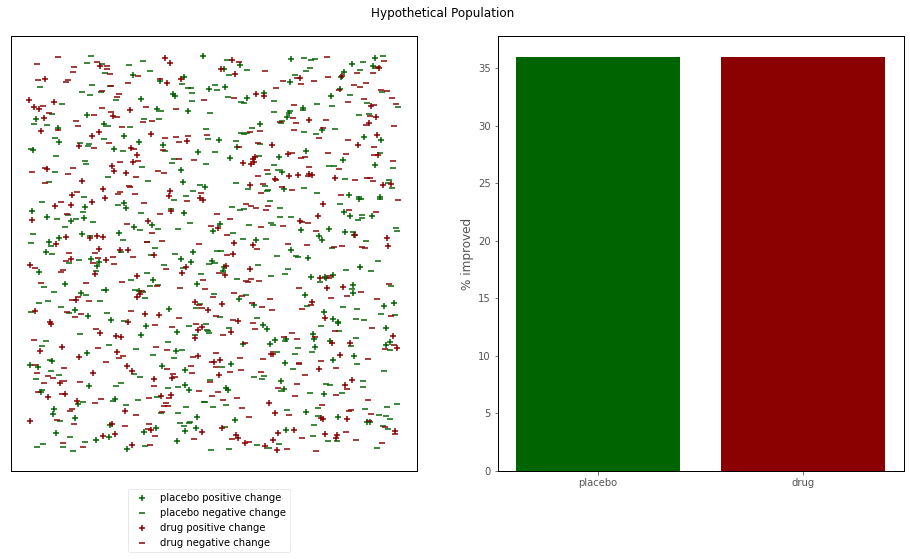

In [5]:
# just run this cell, it generates the plots below
pop_df, placebo, drug = py_found.trial_pop_plot()

In this hypothetical scenario, the drug clearly doesn't work. In fact, exactly the same percentage of each group showed a positive response to treatment, so the drug is quite literally as ineffective as it could possibly be. The risk difference between the groups is 0%.

Imagine if we randomly selected 100 of the change scores, from the graph on the left above. Presume that we do this by writing each islander's name on a piece of paper and putting them in a hat, shaking the hat vigourously for several minutes to shuffle around the scores, and then randomly drawing 100 of them. Would the pattern in that sample of 100 scores be the same as the pattern we see when we look at all 1000 scores?

What if the 100 scores happened to be the 100 scores shown on the lefthand graph below? (The other 900 scores have been grayed out). The graph on the right shows the percentage of positive responders for each group in this sample of 100 people:

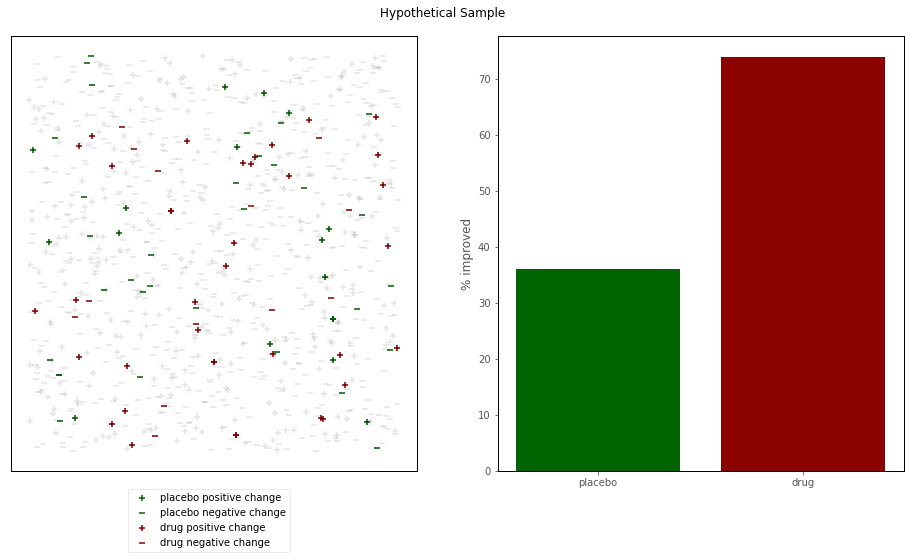

In [6]:
# just run this cell, it generates the plots below
py_found.trial_sample_plot(pop_df, placebo, drug, placebo_change, drug_change)

The scores in this sample of 100 were taken from the 1000 scores that make up the entire hypothetical population. Remember that in the 1000 scores, the percentage of positive treatment responders is *exactly* the same for those who received placebo and those who received the drug.

Yet, in this sample of 100 scores, which were taken from the 1000 scores, the pattern is completely different in the sample than it is in the population of all 1000 islanders.  In the sample of 100 scores, the percentage of positive responders in the drug group is considerably higher than in the placebo group - the risk difference is very large.

This is how a fluke result can happen. If, just by chance, a sample randomly drawn from a population shows a pattern that is not reflective of the pattern in the underlying population. 'Just by chance' in this context means that the sample was genuinely a random sample from the population, and the sample happned to end up with a pattern unreflective of the population pattern.

<b> Even in a scenario involving the entire population, where there is exactly 0% difference between the drug and the placebo group at the population level, it is still possible to get a sample where there is a big difference between the groups. </b> 

The 100 datapoints in the theoretical sample shown above give a very misleading picture of the underlying population. How do we know whether or not the sample from the actual clinical trial is misleading in the very same way?

Remember that the data from the actual trial showed this pattern:

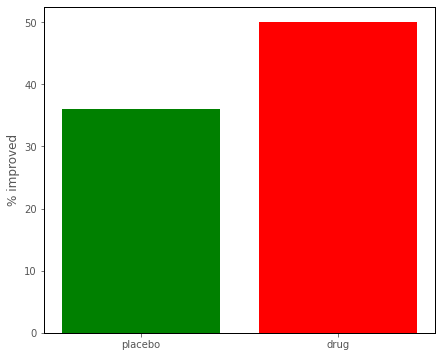

In [7]:
# this code creates the plot
plt.bar(['placebo', 'drug'], 
        [np.sum(placebo_change == '+')/len(placebo_change)*100, np.sum(drug_change == '+')/len(drug_change)*100 ],
       color = ['green', 'red'])
plt.ylabel('% improved')
plt.show()

In the actual trial, relative to the placebo group, there was a 14% risk difference in the percentage of the drug group which showed a positive symptom improvement. Is there a way of telling whether this is a real effect, or just a fluke result of random sampling, as just illustrated above?

## The Null Hypothesis and the Null World

The question of whether the pattern observed in the clinical trial is a fluke is a question of deciding which is more probable, out of two mutually exclusive hypotheses:

* <b> The null hypothesis </b>: the drug does not work. If we conducted the trial with all 1000 residents of the island, we would not observe a difference in the percentage of positive responders in the placebo group vs the drug group.
<br>

* <b> The alternative hypothesis </b>: the drug works. If we conducted the trial with all 1000 residents of the island, we would  observe a greater percentage of positive responders in the drug group vs the placebo group.

You can think of the null hypothesis and the alternate hypothesis as describing two possible states of the world. We need to work out which one better describes the state of the actual world.

We don't have the luxury of including all 1000 islanders in the trial. All we have to go on is the sample we have, of 100 randomly selected islanders. So how can we decide which of the above hypotheses is more plausible, based on the sample we have?

To do this, we need a model of what our sample would look like, on average, if the null hypothesis was true. This model will allow us to get an answer to the following question: "if there drug was completely ineffective, how likely would it be that we would get a risk difference of 14% between the drug and the placebo group, in a random sample of the size we have?". 

*If a 14% risk difference is very, very unlikely if the null hypothesis is true, then we can conclude that the null hypothesis probably isn't true.*

You'll notice the statement just given is probabilistic, rather than absolute. That is the best we can do, and this is why statistics is the science of dealing with uncertainty. We can't know for sure which hypothesis is true, because we do not have access to some Godlike perspective where we can look at the pattern in the whole population. But, using statistics, we can make a decent estimate, based on the available evidence.

So how to do we get a reasonable model of how samples would look, on average, if the null hypothesis were true? How do we know what samples would look like from the ['null world'](https://matthew-brett.github.io/cfd2020/permutation/permutation_and_t_test.html?highlight=null%20world)? 

By using code, we can in fact approximate drawing samples many many times, from a world where the null hypothesis is true. That might sound impossible, but bear with me. First, let's remind ourselves how the raw data looks. The table below shows a subset of the rows from the table that contains the data from the clinical trial (it only shows a subset of the rows to avoid forcing you to scroll through the whole table again!):

In [8]:
# this shows the dataframe
np.random.seed(100)
trial_df.loc[np.sort(np.random.choice(len(trial_df), size = 25))]

,group,change
2,placebo,-
8,placebo,+
9,placebo,-
10,placebo,+
14,placebo,-
15,placebo,+
16,placebo,-
24,placebo,-
24,placebo,-
27,placebo,-


To recapitulate, the `group` column shows the group label for each participant (`drug` or `placebo`) showing which group they were in. The `change` column shows the symptom change score for each participant (`+` or `-`), showing whether the participant's symptoms improved after treatment. 

What we want to know is: if we carried out the trial with the whole population of the island, would we see the same effect that we see in our sample (of a 14% risk difference)?

Let's think clearly about what the null hypothesis and the alternate hypothesis really mean, in the context of a situation where we carried out the trial on the whole population of the island (e.g. if we had a table like the one above, but it contained the data from all 1000 islanders).

If the null hypothesis is true (e.g. the drug doesn't work), then from the perspective of symptom improvement, it doesn't matter if a participant received a drug or received a placebo, it doesn't affect the chances that their symptoms will improve. 

One way of re-stating this is that, if the null hypothesis is true, then each participant's group label (`drug` or `placebo`) should give no information about the probability of symptom improvement. 

Conversely, if the alternative hypothesis is true (e.g. the the drug works), then the group labels should give us a lot of information about the probability of symptom improvement: `+` scores should have a higher probability of being paired with `drug` labels. 

If the null hypothesis is true, then the pairing between the symptom change scores (`+` or `-`) and the group labels (`drug` or `placebo`) should be *random*. This means that the `placebo` labels and the `drug` group labels should have an equal probability of being paired with a `+` or `-`, if the drug doesn't work. Stated more simply: the drug group should have no more chance of `+` changes than the placebo group.

These statements are just other ways of saying 'the drug doesn't work' or 'the drug works'. 

Have a think for a moment about the statements above. Can you think of way of using the data we have to simulate drawing lots of samples a world where the null hypothesis is true? If we can do that, we can work out how likely or unlikely it is that our sample comes from a world where the null hypothesis is true.


## The power of shuffling

Through the power of code and modern computers, we easily can simulate a scenario where the group labels have no relationship to the change scores. In other words, we can simulate the process drawing repeated samples in a world where the null hypothesis is true; where whether a participant received the drug or placebo makes no difference to their chances of showing an improvement in symptoms.

We can do this by *shuffling the group labels around randomly*. Think about it. If the null hypothesis is true - which is to say that if the drug doesn't work -  then participants in the drug group should have no greater chance of having a `+` in the change column than those in the placebo group.

Shuffling the data once gives us one simulated sample where there is no relationship between the group labels and the change scores. If we repeat this process many times, we can build a model of how samples of the size we have would look, on average, if the null hypothesis were true. 

To see the shuffling process in action, let's have a look at the dataframe containing all 100 scores from the clinical trial (sorry for making you scroll again, it's important to see the shuffling process over all of the data!):

In [9]:
# this shows the dataframe containing the results of the clinical trial
pd.set_option('display.max_rows', None)
trial_df

,group,change
0,placebo,-
1,placebo,+
2,placebo,-
3,placebo,-
4,placebo,-
5,placebo,+
6,placebo,+
7,placebo,-
8,placebo,+
9,placebo,-


Now, run the cell below a few times, and pay attention to the `group` column. You can see that the group labels are being shuffled about randomly:

In [10]:
# run this cell a few times and pay attention to the 'group' column, to see python shuffling the data...
pd.set_option('display.max_rows', None) 
trial_df_shuffle = trial_df.copy()
trial_df_shuffle ['group'] = np.random.permutation(trial_df_shuffle['group'] )
trial_df_shuffle 

,group,change
0,placebo,-
1,drug,+
2,placebo,-
3,drug,-
4,drug,-
5,placebo,+
6,placebo,+
7,drug,-
8,placebo,+
9,drug,-


The two graphs below show the data from the actual trial. The graph on the left shows the raw data (again, imagine you are viewing all 100 participants from directly above, as they stand in a field. Imagine that the symbols are superimposed over each participant's position in the field). The graph on the right shows the percentage of positive change scores in each group, from the actual data from the clinical trial: 

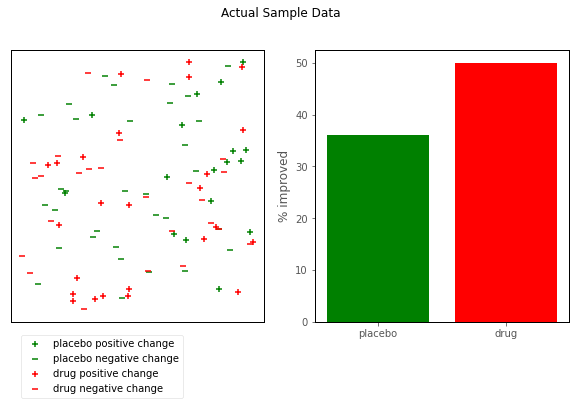

In [11]:
py_found.raw_sample_plot(trial_df)

The graphs below show 5 separate shuffles of the data. Each pair of graph shows the results from one shuffle of the `group` labels.

Look at how the group membership of some of the scores on the lefthand graph changes between each shuffle, and how this affects the percentage of positive responders in each group (shown on the righthand graph).

Re-run the cell a few times to see how the shuffling process affects the graphs (zooming out might help you see this process).

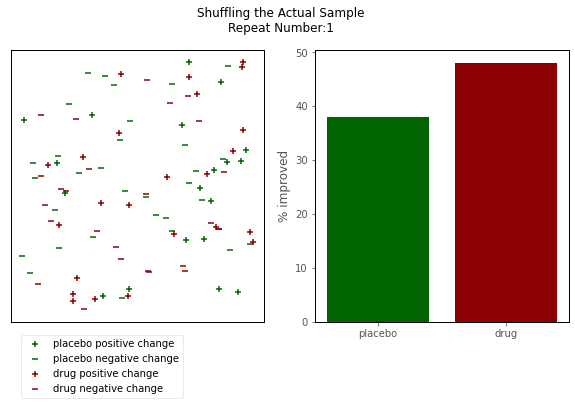

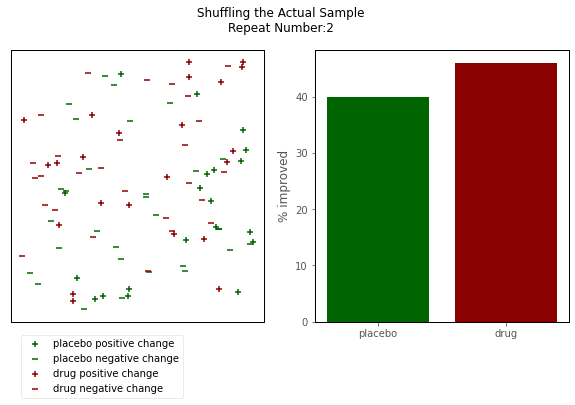

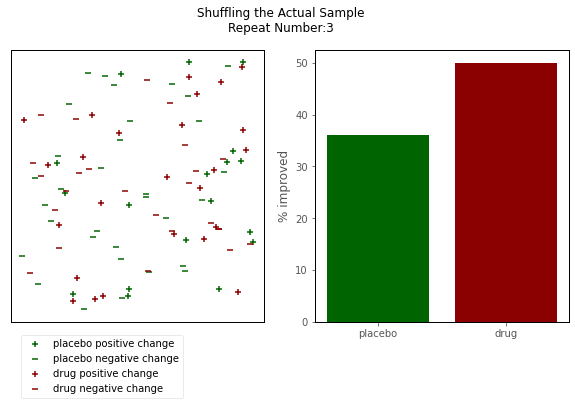

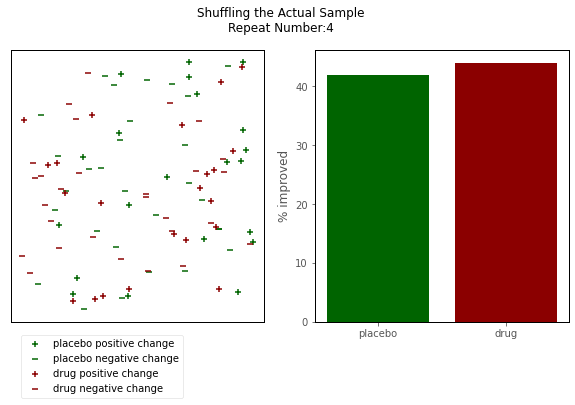

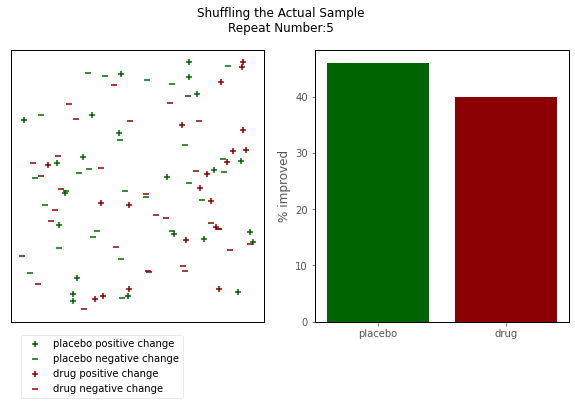

In [12]:
# re-run the cell several times to see the effects of shuffling on the data
py_found.actual_sample_plot_repeated(trial_df)

By following the process below we can build a model of how samples would look, on average, if the null hypothesis were true:

* Shuffle group labels as shown above
* Calculate the difference in the percentage of participants showing symptom improvement (the risk difference), between the `drug` and `placebo` group, from the shuffled data
* Store the risk difference
* Repeat the above three steps a large number of times, until we have a large number of stored risk differences 

At the end of this process we can assess how likely it is that the result from the clinical trial is a fluke. We do this, because the risk differences we get from the shuffled data show us the sort of differences we can expect *if the null hypothesis is true*. 

This process - of repeatedly shuffling data to simulate samples from a world where the null hypothesis is true - is called *simulation*. 

If the difference from the actual trial is very unlikely - e.g. if not many of the risk differences from the simulation are as large as the difference from the actual trial - then we conclude that the null hypothsis probably isn't true. 

The code cell below repeats 10,000 times the process just described. Read through the code, paying attention to the comments, which explain what is happening at each stage.

Run the cell below to perform the simulation, and look at the resulting graph:

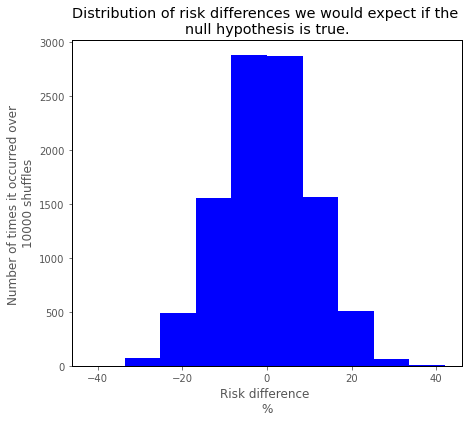

In [13]:
# run this cell to perform the simulation

# set the number of times to repeat the shuffling
n_repeats = 10000

# create an array to store the risk difference on each repeat
simulation_results = np.zeros(n_repeats)

# copy the change scores from the original trial (this helps prevent overwriting the original data accidentally)
change_scores = np.array(trial_df['change'].copy())

# count the number of participants in the placebo group, in the original trial
n_placebo = len(trial_df[trial_df['group'] == 'placebo'])

# this code shuffles the scores, and records the risk difference from the shuffled scores, 10000 times
for i in np.arange(n_repeats):
    
    shuffled_change_scores = np.random.permutation(change_scores)
    
    fake_placebo = shuffled_change_scores[:n_placebo]
    
    fake_drug = shuffled_change_scores[n_placebo:]
    
    risk_diff = np.sum(fake_placebo == '+')/len(fake_placebo)*100 - np.sum(fake_drug == '+')/len(fake_drug)*100 
    
    simulation_results[i] = risk_diff
    
# this plots the simulated risk differences
plt.hist(simulation_results, color = 'blue')
plt.title('Distribution of risk differences we would expect if the \nnull hypothesis is true.')
plt.xlabel('Risk difference \n%')
plt.ylabel('Number of times it occurred over \n10000 shuffles')
plt.show()

The graph above is called a histogram, and it was obtained by shuffling the data, calculating and storing the risk differences from the shuffled data, and repeating this process 10,000 times. This gives a picture of the sort of risk differences we could expect *if there was no association between group membership (`placebo` or `drug`) and symptom change score (`+` or `-`).*

The x axis shows the risk differences, and the y axis shows the number of times that difference ocurred during the simulation.

If you look at the middle of the x axis, you can see that the distribution is centered around 0. This means that on average, if the drug was completely ineffective, we would expect a lot of samples to have something close to a 0% risk difference between the `drug` and `placebo` group.

However, we can see that sometimes fluke results do occur e.g. of a risk difference of around 30% (if you look near to each corner of the graph, you can see that the furthest parts of the historgram are between 30% and 40%). These large risk differences are much less common, however, than differences closer to 0 (which you can see by the height of blue area above the risk difference shown on the x axis - it is high near 0% and very small near 40%).

We can now use this graph to see how unlikely the actual 14% difference from the clinical trial is, if the null hypothesis is true. Run the cell below, it will produce a graph which compares the actual risk difference (shown as a red line) from the clinical trial to the simulated risk differences:

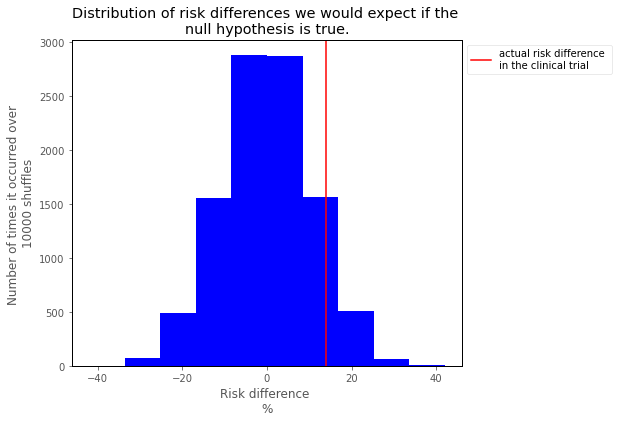

In [14]:
actual_risk_diff = np.round(np.sum(drug_change == '+')/len(drug_change)*100 - np.sum(placebo_change == '+')/len(placebo_change)*100, 2)
plt.hist(simulation_results, color = 'blue')
plt.axvline(x = actual_risk_diff, color = 'red', label = 'actual risk difference \nin the clinical trial')
plt.title('Distribution of risk differences we would expect if the \nnull hypothesis is true.')
plt.xlabel('Risk difference \n%')
plt.ylabel('Number of times it occurred over \n10000 shuffles')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

The code cell below calculates the percentage of the risk differences in the simulation which were at least as large as the difference obtained in the actual clinical trial (this is the proportion of the blue area of the graph which is to the right of the red line):

In [16]:
# this code just calculates and prints out the proportion of the blue area of the graph which is to the 
# right of the red line
print(np.count_nonzero(simulation_results >= actual_risk_diff)/len(simulation_results) * 100, '%')

11.73 %


Let's just go over what we are trying to achieve here.

We want to know how improbable the actual risk difference from the trial would be, if the null hypothesis was true.

To get an estimate of that probability, we have simulated drawing 10,000 samples from a world where the null hypothesis is true. We have done this by shuffling about the group labels (`placebo` or `drug`) in the data, which ensures that the relationship between group membership and symptom change score (`+` or `-`) is random, as it should be if the null hypothesis is true.

We have just found that around 11% of the samples in the simulation had risk differences *larger* than the one from the actual trial. This means that *even if the null hypothesis was true* there is something like an 11% chance of getting a risk difference as large as the actual difference in the clinical trial.

So, should the health system on the island begin recommending that all islanders take Adirudin to reduce their cognitive impairment? 

This is not an easy question to answer. But by convention, we only conclude that the null hypothesis is probably false if there is less than a 5% chance of obtaining the actual difference from a world where the null hypothesis was true. 

In this case there is something like an 11% chance of obtaining the actual 14% risk difference (or larger), if the null hypothesis is true. So by convention, we should conclude that Adirudin is *not effective* for reducing cognitive impairment, based on the results of the clinical trial. The risk difference in the actual trial is not large enough to convince us that it is not a fluke result from random sampling.

## Something in the air, something in the water 

Regardless of whether Adirudin works, what could be causing the cognitive impairment of the islanders? Is it the high levels of pollution that affect the island, as the epidemiologist in your research group stated?

To try and answer this question, your team decides to investigate whether high `pollutant_exposure` is associated with high `cognitive_impairment` by conducting an [observational study](https://www.iwh.on.ca/what-researchers-mean-by/observational-vs-experimental-studies#:~:text=Observational%20studies%20are%20ones%20where,two%20types%20of%20observational%20studies.). You take a new random sample of 100 people from the island, all of whom agree to participating in the study. Arm-worn air monitors are used to record the average number of micrograms per cubic metre (`μg/m^3`) of a variety of pollutants that each participant is exposed to each day over several weeks. The participants also complete a psychological questionairre which measures cognitive impairment.

(It is important that the sample is random to ensure the highest chance that it is representative of the whole population of the island (e.g.the lowest probability of a fluke result). 'Random' in this context means that each islander has an equal probability of being included in the sample. The research group ensures that the sample is random by picking islanders from census data using a random number generator (python makes it easy to do this!)).

The graph below shows a scatterplot of the `pollutant_exposure` scores against the `cognitive_impairment` scores. Each point represents the score on each variable for one individual in the sample:

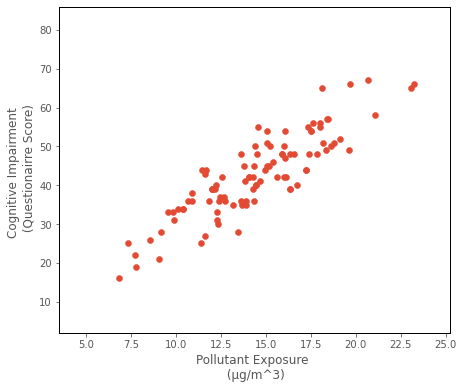

In [17]:
# run this cell to generate the data for this example
# do not worry about this code, it just runs some functions to generate the graph below
pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null,min_x, max_x, min_y, max_y, pollutant_exposure, cognitive_impairment = py_found.data_gen_pollution()
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

As before, it is important to graphically inspect the data.
    
From the graph above, do you think there is a relationship between `pollutant_exposure` and `cognitive_impairment`? Take a few moments to look at the graph and think about this before reading on... (remember that each point represents a single individual's score on both variables).
    
It does appear, from graphical inspection, that the two variables are related. It looks like people with higher scores on `pollutant_exposure` generally had higher scores on `cognitive_impairment`. 
    
To get a statistic that captures this relationship, we can calculate [Pearson's $r$](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). 
    
Pearson's $r$ ranges from -1 to 1, and indicates the strength and direction of the linear (straight-line) relationship between two numerical variables. The graph below shows some ways the sample could have looked, and what Pearson's $r$ would be in that instance:

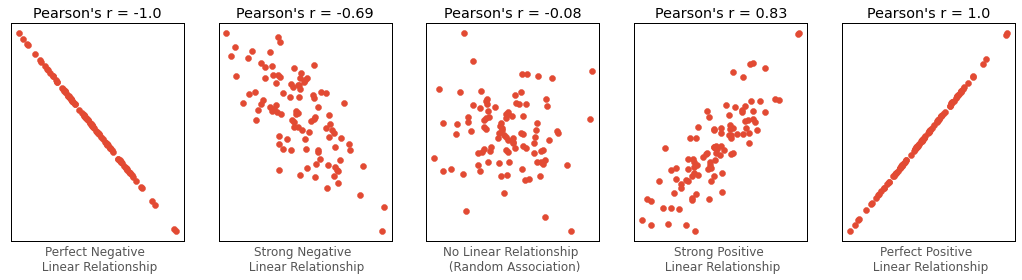

In [18]:
# this code just generates the plot below
py_found.pearson_plot(pollutant_exposure)

Let's calculate Pearson's $r$ for the `pollutant_exposure` and `cognitive_impairment` data from the sample. This statistic is calculated using a python function (more on this [later](3_functions_plotting.ipynb)!).

Do not worry about the code below, it just calculates Pearson's $r$, and shows how easy it is to calculate statistics using python. Also do not worry about how Pearson'r $r$ is calculated, for now let's just focus on what the statistic tells us. If you are interested in the specifics of how Pearson's $r$ is computed [see this page](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/):

In [19]:
# this code just calculates pearson's r, rounds it to two decimal places, and then prints it below the cell
actual_r = np.round(scipy.stats.pearsonr(pollutant_exposure, cognitive_impairment)[0], 2)
print("Pearson's r = ", actual_r )

Pearson's r =  0.87


A Pearson's $r$ value of 0.87 represents a very strong positive linear relationship between the two variables, meaning that, in our sample of 100 islanders, high `pollutant_exposure` scores are generally paired with high `cognitive_impairment` scores.

## Populations & Samples, Parameters & Statistics

So, is the hypothesis settled then? Can we conclude that `pollutant_exposure` is associated with `cognitive_impairment`? And further, from that association can we conclude that high `pollutant_exposure` causes `cognitive_impairment`?

Remember that our sample is of 100 people. There are 1000 people on the island. Our hypothesis - that `pollutant_exposure` is associated with `cognitive_impairment` - is about all 1000 people on the island, not just the 100 people in our sample.

In statistical terms, our hypothesis is about the *population* of the island. The term '*population*' was mentioned earlier, but let's define it again, in a more technical sense. In statistics, a '*population*' is defined as all the individuals we could theoretically observe, which are relevant to a particular hypothesis. (More specifically, the population is all the *observational units* we could theoretically observe; in this case, these units are individual people, but in other instances they may be plants, cars, books, stars etc., depending on the subject area...). For our current hypothesis, the population is all the individuals who live on the island.

However, our data comes from our *sample*, which is a subset of the total population.

The numerical characteristics (such as Pearson's $r$) of *populations* are called *parameters*. <br>
The numerical characteristics (such as Pearson's $r$) of *samples* are called *statistics*.

As with the drug trial, the question remains: what if the pattern we observe in our sample is not reflective of the pattern in the population? Our sample was drawn randomly, but what if, just by chance, we got a sample which shows a strong relationship between `pollutant_exposure` and`cognitive_impairment`, even though none exists in the underlying population?

The two graphs below both show our sample (in red). They also show two ways that the underlying population of all 1000 islanders (shown in dark blue) *could* look: 

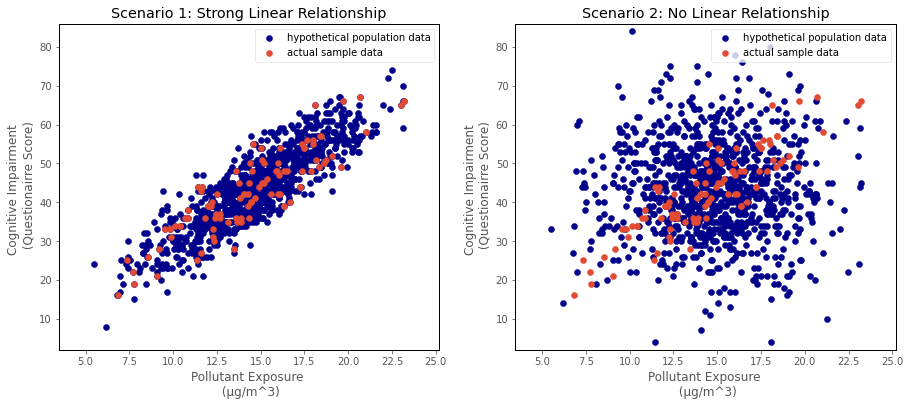

In [20]:
# this code just generates the graph below
py_found.plot_populations(pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null, pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

You can think of each of these graphs as showing two possible states of the world which could have generated our sample. 

In the graph on the left (`Scenario 1`), the pattern in the sample is reflective of the relationship in the underlying population. In `Scenario 1` the hypothetical underlying population shows a *strong positive linear relationship* between `pollutant_exposure` and `cognitive_impariment`. Higher scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`. So if we know a given individual's `pollutant_exposure` score, this tells us a lot about their `cognitive_impairment` score (if their `pollutant_exposure` score is high, their `cognitive_impairment` score is also probably high, and *vice versa*).

In the graph on the right (`Scenario 2`), the pattern in the sample is <b> not </b> reflective of the relationship in the hypothetical underlying population. In `Scenario 2`, the pattern in our sample is a fluke, and if we infer that the pattern in the population is like the one in our sample, we will be making a serious error. The population pattern shown in this graph is one where there is *no linear relationship* between `pollutant_exposure` and `cognitive_impariment`. The two variables are *randomly associated*. What this means is that, if you look at points with high values of `pollutant_exposure`, these are paired with both *high and low* values of `cognitive_impairment`. This means that an individual's `pollutant_exposure` score does not tell us much about their `cognitive_impairment` score...

If something like `Scenario 2` is true, then the strong linear relationship in our sample is a fluke. It is not feasible to observe all 1000 people on the island in order to work out whether `Scenario 1` or `Scenario 2` is true of the actual underlying population. So, we need a good way of making inferences from our sample statistic about the underlying population parameter, in order to work whether the the *actual* population of the island is most similar to the hypothetical population depicted in `Scenario 1` or `Scenario 2`.

This is a fundamental problem in statistics and data science: we care about *populations* and *parameters* but all we can usually observe are *samples* and *statistics*. 

We need a way of inferring what the population parameter looks like, based on our sample statistic. Statistical methods of making such inferences, from samples to populations, aim to allow us to be *least wrong most of the time*. However, because we are making inferences about population parameters, rather than directly measuring them, there is always some uncertainty in our estimates and conclusions.


## Revisiting the null hypothesis & the null world

To begin the inferential process, we assume that something like `Scenario 2` is true, and ask:

> 'if there was *no relationship* between `pollutant_exposure` and `cognitive_impairment` in the population, how likely is it we would have gotten a sample with the Pearson's $r$ value that our sample had?'

Again, this assumption, of no relationship, is called the *null hypothesis*.

Once more, what python allows us to easily do, is build a model of a world where the null hypothesis is true (again, let's call this the [null world](https://uob-ds.github.io/cfd2021/permutation/permutation_and_t_test.html)). Once we have built a model of the null world, we can draw samples from it repeatedly, and record the distribution of sample statistics that we get from our model of the null world. This gives us an idea of the range of Pearson's $r$ values we would expect if the null hypothesis were true: if `pollutant_exposure` and `cognitive_impairment` were randomly associated in the population. 

We can then compare the Pearson's $r$ statistic from the actual sample to the Pearson's $r$ statistics that we get from samples drawn from our model of the null world. If our actual statistic is very unlikely in the null world, we conclude that the real world is *probably not similar to the null world*.

To get an idea of what we need to do to carry out this inferential process, let's look at the raw data:

In [21]:
# run this cell to generates the dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': cognitive_impairment})
pd.set_option('display.max_rows',15)
display(df)

,pollutant_exposure,cognitive_impairment
0,10.40,34
1,11.42,44
2,18.16,51
3,19.10,52
4,12.29,33
...,...,...
95,16.53,48
96,10.12,34
97,10.68,36
98,9.80,33


The dataframe above, shows the raw scores for the individuals in our sample. It is truncated for graphical display (as you've already scrolled through enough dataframes with 100 rows earlier in the page!). 

Each row of the dataframe shows the `pollutant_exposure` and `cognitive_impairment` score for one individual in our sample.

We know that, based on graphical inspection and the Pearson's $r$ we calculated earlier, in this sample *higher* scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`. This is a *nonrandom* relationship: high `pollutant_exposure` scores have a higher chance of being associated with high `cognitive_impairment` scores.

However, if in the underlying population there was no relationship between `pollutant_exposure` and `cognitive_impairment`, then if we had a dataframe containing the scores for all 1000 islanders, the association between the `pollutant_exposure` scores and `cognitive_impairment` scores in that population dataframe would be random: high `pollutant_exposure` scores would have an equal chance of being associated with high or low `cognitive_impairment` scores.  Thus, if we drew a sample of 100 scores randomly from that population dataframe, we would expect (on average) the relationship between `pollutant_exposure` and `cognitive_impairment` to also be random in that sample. In the null world, any samples which showed a strong relationship (a high Pearson's $r$) would be flukes. For one sample, the relationship may not be exactly random, but on average it should be if we draw repeated samples, as repeated sampling gives us a more accurate picture of the underlying population.

In the dataframe below, the `cognitive_impairment` scores have been shuffled using python. Compare a few rows to the same rows from the dataframe above - you'll see that the `pollutant_exposure` scores are the same for each individual, but the `cognitive_impairment` scores have been randomly shuffled; (re-run the cell a few times to see the shuffling process):

In [22]:
# run this cell to generate the shuffled dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)})
pd.set_option('display.max_rows',15)
df

,pollutant_exposure,cognitive_impairment
0,10.40,36
1,11.42,48
2,18.16,36
3,19.10,27
4,12.29,42
...,...,...
95,16.53,50
96,10.12,44
97,10.68,45
98,9.80,50


By shuffling the `cognitive_impairment` scores we have simulated a sample from a world where the null hypothesis was true - where the association between the `pollutant_exposure` and `cognitive_impairment` is random.

The three dataframes below show the results of shuffling the `cognitive_impairment` scores three separate times. Again, observe that the `pollutant_exposure` scores stay the same, but the association between them and the `cognitive_impairment` scores is now random:

In [23]:
# run this cell to repeat the shuffling process three times

# set the number of shuffles
n_iters = 3
pd.set_option('display.max_rows',15)
# perform the shuffles, and display the data each time
for i in np.arange(n_iters):
    print('\nShuffle Number', i+1, ':')
    display(pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)}))


Shuffle Number 1 :


,pollutant_exposure,cognitive_impairment
0,10.40,51
1,11.42,35
2,18.16,39
3,19.10,55
4,12.29,36
...,...,...
95,16.53,45
96,10.12,45
97,10.68,45
98,9.80,16



Shuffle Number 2 :


,pollutant_exposure,cognitive_impairment
0,10.40,36
1,11.42,25
2,18.16,44
3,19.10,48
4,12.29,49
...,...,...
95,16.53,54
96,10.12,65
97,10.68,28
98,9.80,42



Shuffle Number 3 :


,pollutant_exposure,cognitive_impairment
0,10.40,39
1,11.42,34
2,18.16,36
3,19.10,48
4,12.29,51
...,...,...
95,16.53,48
96,10.12,42
97,10.68,46
98,9.80,33


The plots below show how the scatterplot of the sample looks, as the `cognitive_impairment` scores are shuffled 6 separate times (re-run the cell several times to see the shuffling process at work):

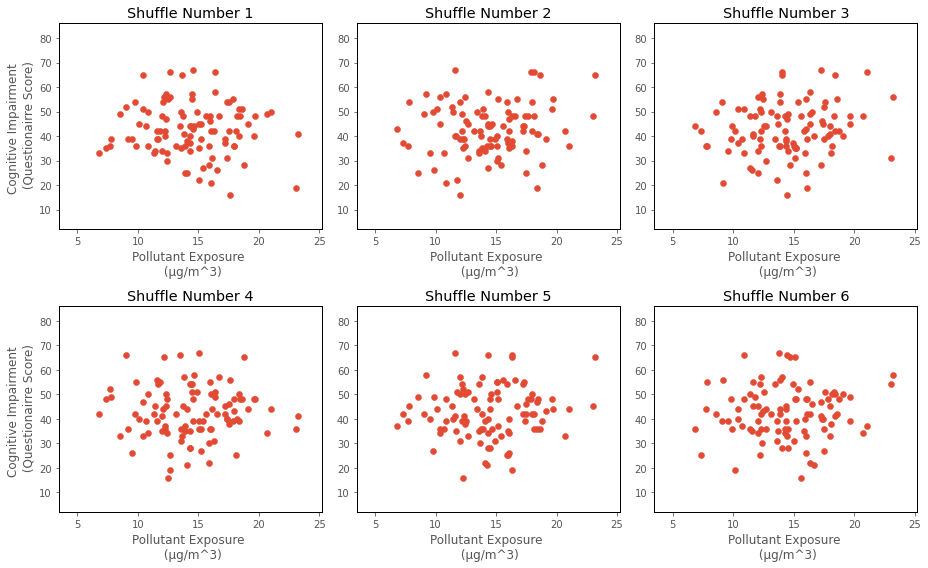

In [24]:
# this code just generates the graphs below
py_found.plot_sample_shuffle(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Relative to the plot of actual sample (shown below), we can see that this shuffling clearly randomizes the relationship between `pollutant_exposure` and `cognitive_impairment`:

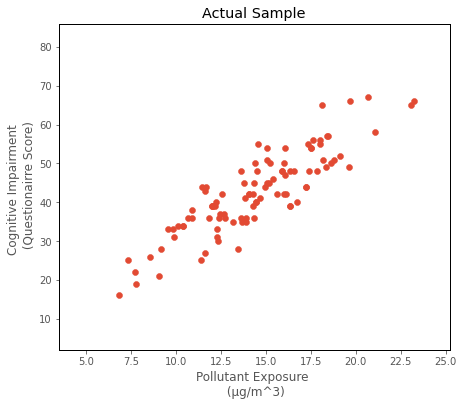

In [25]:
# this code just generates the graph below
plt.title('Actual Sample')
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Samples with random associations are generally what we would expect if the population association was random.

The graph below shows 6 shuffles of the sample, plotted against the hypothetical population from `Scenario 2`, where there is no population relationship between `pollutant_exposure` and `cognitive_impairment`. Graphically, you can see that the shuffled sample looks vary similar to the hypothetical underlying population where there is no association between `pollutant_exposure` and `cognitive_impairment`:

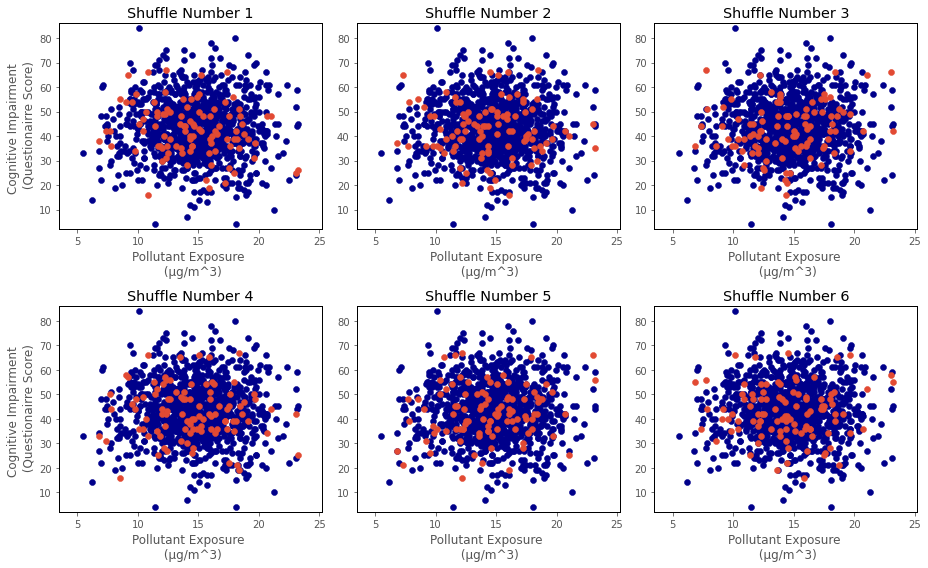

In [26]:
# this code just generates the graphs below
py_found.plot_sample_shuffle_with_pop(pollutant_exposure, cognitive_impairment,  pollutant_exposure_pop, 
                                      cognitive_impairment_pop_null, min_x, max_x, min_y, max_y)

## Simulating the 'null world'

To recapitulate: the shuffling process is simulating a sample from a world in which the null hypothesis is true. E.g. where there is no relationship between `pollutant_exposure` and `cognitive_impairment`.

If we repeat this shuffling process many, many times, and calculate Pearson's $r$ for the shuffled sample each time, we get a distribution of Pearson's $r$ statistics that would be likely if the null hypothesis were true.

The cell below performs this simulation. It shuffles the data, calculates Pearson's $r$ for the shuffled data, and then plots the Pearson's $r$ values obtained from the simulation against the $r$ value from the actual sample (where $r = 0.87$). Don't worry about the specifics of the code, they will become clearer in the rest of the textbook, but do pay attention to how few lines of code it takes to perform this simulation:

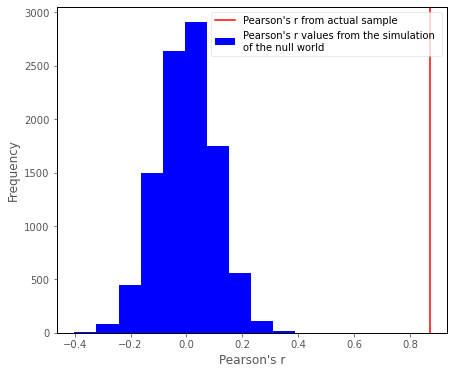

In [27]:
# run this cell to perform the simulation

# set the number of times the shuffling process should be repeated
n_iters = 10000

# create an array to store the pearson's r values from the shuffled data
fake_r = np.zeros(n_iters)

# shuffle the data 10,000 times and store the simulated pearson's r values
for i in np.arange(n_iters):
    shuffled_cog_impairment = np.random.permutation(cognitive_impairment)
    fake_r[i] = scipy.stats.pearsonr(pollutant_exposure, shuffled_cog_impairment)[0]

# plot the r values obtained from the simulation of the null world
plt.hist(fake_r, color = 'blue', label = "Pearson's r values from the simulation \nof the null world")

# plot the r value obtained from the actual sample
plt.axvline(actual_r, color = 'red', label = "Pearson's r from actual sample")

# label the axes and show the legend
plt.xlabel("Pearson's r")
plt.ylabel('Frequency')
plt.legend();

We can see that, in the simulation, a Pearson's $r$ as large as the one from the actual sample never occurred.

We can conclude that the null hypothesis is probably not true. If it was true, it would be very, very unlikely to get a sample with a relationship as strong as the one we observed.

If fact, we can also easily calculate the percentage of simulated $r$ values which were at least as large as the actual $r$ value we obtained:

In [28]:
# run this cell to calculate the percentage of pearson's r values from the null world which were at least as large as the actual r value
np.count_nonzero(fake_r >= np.abs(actual_r))/len(fake_r) * 100

0.0

0% of the simulated samples from the null world had Pearson's $r$ values at least as large as the $r$ value from the actual sample.

From this, we can infer that the the actual population of the island is probably not simular to the population simulated in the null world, and that `pollutant_exposure` probably is associated with `cognitive_impairment` in the population of of all 1000 islanders.

Does this prove that pollution on the island is causing cognitive impairment? Again, this is a hard question to answer. You have probably heard the addage that 'correlation does not equal causation'. It may be that some other variable is causing the cognitive impairment, and that the pollution is correlated with cognitive impairment, but that it is causally unrelated. 

As such, the evidence we have implies that `pollutant_exposure` is probably correlated with `cognitive_impairment` at the population level. This is consistent with - and maybe suggestive of - a causal link. But it does not prove it - this would require additional studies which control for the effects of other variables, and demonstrate causality (such as showing that reducing pollutant exposure reduces cognitive impairment). As another saying goes, *'more research needed'*.  

(In fact, in the real world, there is some evidence that [pollution can cause cognitive impairment](https://www.pnas.org/content/115/37/9193.short)).


## Python makes this process easy

Python makes it easy to perform the sorts of analyses shown on this page. The aim of this textbook is to teach you the machinery you need to perform them yourself. 

<b> Do not worry if you do not understand the logic of this sort of analysis yet, </b> it will become clearer when you run it yourself in code. The <b> key point is that python makes it easy to build a model of how the world would look if a specific hypotheses were true. </b> We can then compare data from the actual world against data generated from this model, to see if the model is a good model of the actual world.

This is a very powerful method of analysis, and is enabled by the power of modern computers.

Now, let's dive into coding itself on the [next page](2_lists_indexing.ipynb).

Or, you can [return to the main page](0_main_page.ipynb).

To navigate to any other page, the table of contents is below:

## Other Chapters

1. [Populations, Samples & Questions: Why Learn Python?](1_populations_samples_questions.ipynb)
2. [Lists & Indexing](2_lists_indexing.ipynb)
3. [Arrays & Boolean Indexing](3_arrays_booleans.ipynb)
4. [Functions & Plotting](4_functions_plotting.ipynb)
5. [For Loops - doing things over (and over and over...)](5_for_loops.ipynb)
6. [Testing via Simulation: Psychosis Prevalence](6_simulation_psychosis_prevalence.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 